In [48]:
import pandas as pd
import matplotlib
import matplotlib.pyplot 

d = {'connect_wsec_ms': [], 'publish_wsec_ms': [], 'subscribe_wsec_ms': [], 'connect_nosec_ms': [], 'publish_nosec_ms': [], 'subscribe_nosec_ms': []}

# load log with sec
file = open('logs/server_time_sec_2023-05-04_19-45-13.658.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_wsec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_wsec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_wsec_ms'].append(time_s*1000);

# load log with no sec
file = open('logs/server_time_nosec2023-05-04_19-45-13.658.log', 'r')
lines = file.read().splitlines()
file.close()

for line in lines:
    if not line:
        continue
    if 'handle__connect::' in line:
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['connect_nosec_ms'].append(time_s*1000);
    if 'handle__publish::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['publish_nosec_ms'].append(time_s*1000);
    if 'handle__subscribe::' in line:        
        time_s=float(line.split(':')[3].replace(' s', ''))
        d['subscribe_nosec_ms'].append(time_s*1000);       
        
df1 = pd.DataFrame(d['connect_wsec_ms'])
df2 = pd.DataFrame(d['publish_wsec_ms'])
df3 = pd.DataFrame(d['subscribe_wsec_ms'])
df4 = pd.DataFrame(d['connect_nosec_ms'])
df5 = pd.DataFrame(d['publish_nosec_ms'])
df6 = pd.DataFrame(d['subscribe_nosec_ms'])

df_connect = pd.concat([df1.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)
df_publish = pd.concat([df2.reset_index(drop=True), df5.reset_index(drop=True)], axis=1)
df_subscribe = pd.concat([df3.reset_index(drop=True), df6.reset_index(drop=True)], axis=1)

df_connect.columns = ['tls', 'no sec.']
df_publish.columns = ['acl', 'no sec.']
df_subscribe.columns = ['acl', 'no sec.']



151244
0.025 0.020999999999999998 1.1904761904761907
0.01 0.005 2.0
0.02623548702758457 0.022558500438217874 1.1629978286649436
0.013553129070027498 0.008653834140765702 1.5661415332866895


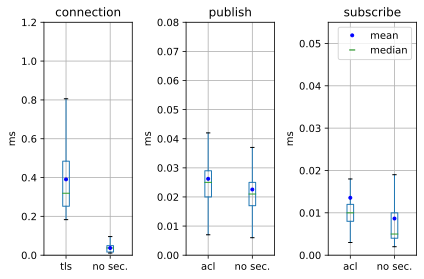

In [49]:
%config InlineBackend.figure_formats = ['svg']
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=3) # 3 subplots

bp = df_connect.boxplot(ax=axes[0], column=['tls', 'no sec.'], showfliers=False, showmeans=True, meanprops={"marker":".","markerfacecolor":"blue", "markeredgecolor":"blue"})
bp.set_title('connection')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=1.2)

bp = df_publish.boxplot(ax=axes[1], column=['acl', 'no sec.'], showfliers=False, showmeans=True, meanprops={"marker":".","markerfacecolor":"blue", "markeredgecolor":"blue"})
bp.set_title('publish')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=.08)

bp = df_subscribe.boxplot(ax=axes[2], column=['acl', 'no sec.'], showfliers=False, showmeans=True, meanprops={"marker":".","markerfacecolor":"blue", "markeredgecolor":"blue"})
bp.set_title('subscribe')
bp.set_ylabel('ms')
bp.axis(ymin=0, ymax=.055)

fig.tight_layout() # spacing between sub plots

print(df_publish['acl'].count())
print(df_publish['acl'].median(), df_publish['no sec.'].median(), df_publish['acl'].median()/ df_publish['no sec.'].median())
print(df_subscribe['acl'].median(), df_subscribe['no sec.'].median(), df_subscribe['acl'].median()/ df_subscribe['no sec.'].median())
print(df_publish['acl'].mean(), df_publish['no sec.'].mean(), df_publish['acl'].mean()/ df_publish['no sec.'].mean())
print(df_subscribe['acl'].mean(), df_subscribe['no sec.'].mean(), df_subscribe['acl'].mean()/ df_subscribe['no sec.'].mean())

matplotlib.pyplot.plot([], [], '-', linewidth=0, marker='.', color='blue', label='mean')
matplotlib.pyplot.plot([], [], '-', linewidth=0, marker='_', color='green', label='median')
#matplotlib.pyplot.legend(loc='lower left',bbox_to_anchor=(.15,-.25))
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig(f'sec-timing.svg')


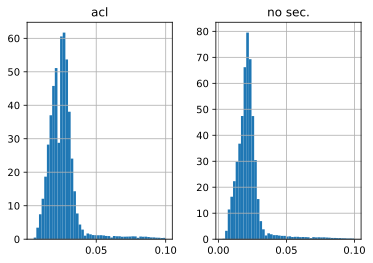

In [50]:
df_filtered=df_publish[df_publish['acl'] <= 0.1]
df_filtered=df_filtered[df_filtered['no sec.'] <= 0.1]
cdf=df_filtered.hist(cumulative=False, density=1, bins=50)


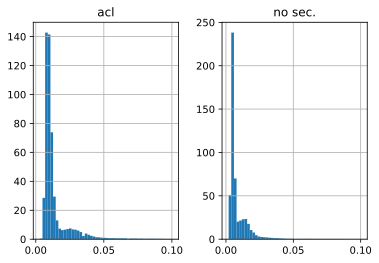

In [51]:
df_filtered=df_subscribe[df_subscribe['acl'] <= 0.1]
df_filtered=df_filtered[df_filtered['no sec.'] <= 0.1]
cdf=df_filtered.hist(cumulative=False, density=1, bins=50)


tls        102
no sec.    102
dtype: int64


(0.0, 1.0)

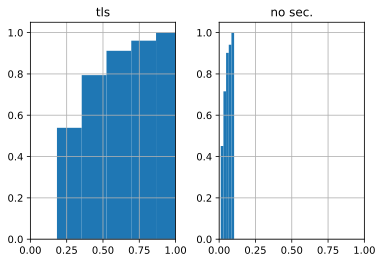

In [61]:
print(df_connect.count())
fig = df_connect.hist(cumulative=True, density=1, bins=5)

fig[0][0].set_xlim((0,1))
fig[0][1].set_xlim((0,1))
